In [10]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#X_train = np.expand_dims(X_train, 3)
#X_test = np.expand_dims(X_test, 3)



In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=2, validation_data=(X_test, y_test))

Epoch 1/50
782/782 - 9s - loss: 2.5564 - accuracy: 0.2886 - val_loss: 1.6977 - val_accuracy: 0.3933 - 9s/epoch - 12ms/step
Epoch 2/50
782/782 - 9s - loss: 1.6142 - accuracy: 0.4230 - val_loss: 1.5443 - val_accuracy: 0.4419 - 9s/epoch - 11ms/step
Epoch 3/50
782/782 - 9s - loss: 1.4943 - accuracy: 0.4676 - val_loss: 1.4317 - val_accuracy: 0.4773 - 9s/epoch - 12ms/step
Epoch 4/50
782/782 - 9s - loss: 1.3983 - accuracy: 0.5047 - val_loss: 1.3802 - val_accuracy: 0.5055 - 9s/epoch - 12ms/step
Epoch 5/50
782/782 - 9s - loss: 1.3399 - accuracy: 0.5237 - val_loss: 1.3557 - val_accuracy: 0.5179 - 9s/epoch - 11ms/step
Epoch 6/50
782/782 - 11s - loss: 1.2943 - accuracy: 0.5422 - val_loss: 1.4871 - val_accuracy: 0.4875 - 11s/epoch - 14ms/step
Epoch 7/50
782/782 - 8s - loss: 1.2559 - accuracy: 0.5589 - val_loss: 1.2643 - val_accuracy: 0.5548 - 8s/epoch - 11ms/step
Epoch 8/50
782/782 - 8s - loss: 1.2251 - accuracy: 0.5708 - val_loss: 1.3034 - val_accuracy: 0.5441 - 8s/epoch - 11ms/step
Epoch 9/50
782

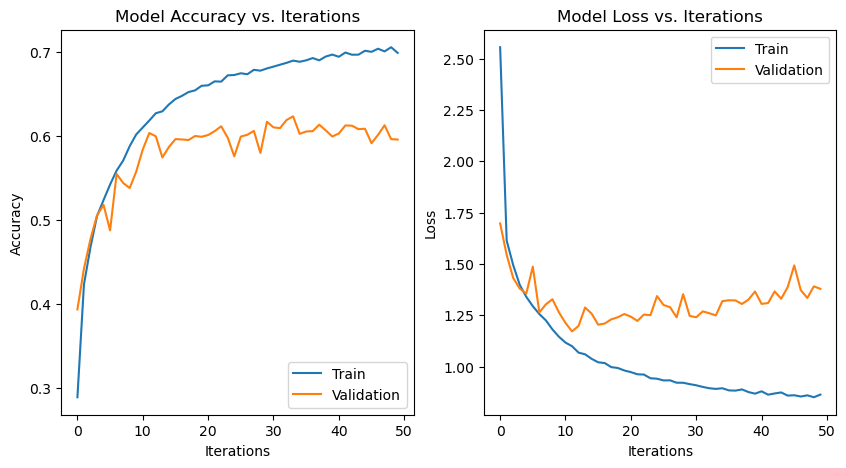

In [14]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [15]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=X_train[0].shape, include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [19]:
image_batch, label_batch = next(iter())
feature_batch = base_model()
print(feature_batch.shape)

NameError: name 'train_dataset' is not defined

In [17]:
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [18]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

NameError: name 'feature_batch' is not defined